In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [3]:
dataset1 = pd.read_csv('/content/generated-dataset-2025-08-05.csv')
X = dataset1[['input']].values
y = dataset1[['output']].values
dataset1

,input,output
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10
5,6,12
6,7,14
7,8,16
8,9,18
9,10,20


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [5]:
scaler =MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [7]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 8)
        self.fc3 = nn.Linear(8, 1)
        self.relu = nn.ReLU()
        self.history={'loss':[]}

    def forward(self,x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x


In [9]:
monish_brain=NeuralNetwork()
criteria=nn.MSELoss()
optimizer=optim.RMSprop(monish_brain.parameters(), lr=0.001)


In [10]:
def train_model(monish_brain,X_train,y_train,criteria,optimizer,epochs=2000):
    for epoch in range(epochs):
      optimizer.zero_grad()
      output = monish_brain(X_train)
      loss = criteria(output, y_train)
      loss.backward()
      optimizer.step()

      monish_brain.history['loss'].append(loss.item())
      if epoch % 200 == 0:
        print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')


In [11]:
train_model(monish_brain, X_train_tensor, y_train_tensor, criteria, optimizer)


Epoch [0/2000], Loss: 516.786011
Epoch [200/2000], Loss: 220.834869
Epoch [400/2000], Loss: 70.153587
Epoch [600/2000], Loss: 54.249161
Epoch [800/2000], Loss: 36.355038
Epoch [1000/2000], Loss: 16.344370
Epoch [1200/2000], Loss: 2.687710
Epoch [1400/2000], Loss: 0.039319
Epoch [1600/2000], Loss: 0.005947
Epoch [1800/2000], Loss: 0.001990


In [12]:
with torch.no_grad():
    test_loss = criteria(monish_brain(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')

Test Loss: 0.210798


In [13]:
loss_df = pd.DataFrame(monish_brain.history)

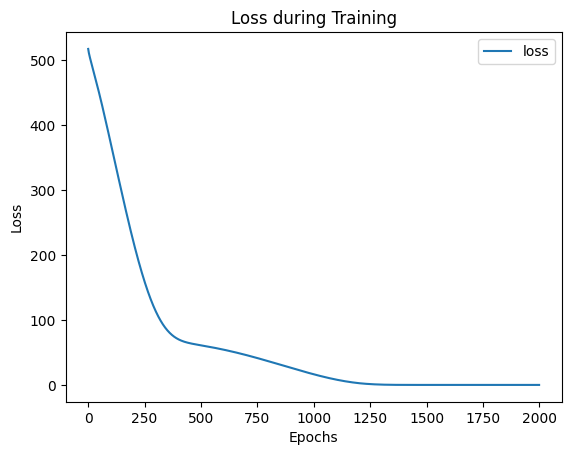

In [14]:
import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()


In [15]:
X_n1_1 = torch.tensor([[9]], dtype=torch.float32)
prediction = monish_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 17.95609474182129
